In [337]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import linear_model

In [338]:
df = pd.read_csv("Players.csv")
df = df.drop(['Player','Span'], axis=1)

df.isnull().values.any()
df

,Mat,Inns,NO,HS,Ave,BF,SR,100,50,0,4s,6s,Runs
0,664,782,74,248*,48.52,50817+,67.58*,100,164,34,4076+,264,34357
1,594,666,67,319,46.77,42086,66.56,63,153,28,3015,159,28016
2,560,668,70,257,45.95,40130,68.48,71,146,39,2781,246,27483
3,652,725,62,374,39.15,40100,64.73,54,136,47,2679,170,25957
4,519,617,97,224,49.10,45346,56.3,62,149,33,2455,254,25534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,245,305,41,166,39.30,15989+,50.04*,18,58,22,737+,41+,10376
84,202,268,16,219,40.97,15903,64.93,26,52,25,1382,84,10326
85,242,283,18,206,38.95,14994,68.85,20,63,20,1188,37,10324
86,220,271,29,299,41.93,18666,54.36,21,52,12,1037,56,10148


In [339]:
#changin strings to integers for processing
df = df.replace('[+*^]','', regex=True)
df['SR'] = df['SR'].astype(float)
df = df.apply(lambda x: x.astype(int))
print(df.dtypes)

Mat     int32
Inns    int32
NO      int32
HS      int32
Ave     int32
BF      int32
SR      int32
100     int32
50      int32
0       int32
4s      int32
6s      int32
Runs    int32
dtype: object


In [340]:
df_norm = df.copy()  # Make a copy of the DataFrame
for col in df.columns:
    df_norm[col] = minmax_scale(df[col])
# print(df_norm.head())  # Print the first few rows of the normalized DataFrame
df = df_norm
df

,Mat,Inns,NO,HS,Ave,BF,SR,100,50,0,4s,6s,Runs
0,1.000000,1.000000,0.476923,0.426415,0.833333,1.000000,0.318841,1.000000,1.000000,0.568182,1.000000,0.468750,1.000000
1,0.848485,0.774757,0.423077,0.694340,0.766667,0.787090,0.304348,0.606383,0.906780,0.431818,0.682240,0.275735,0.739365
2,0.774892,0.778641,0.446154,0.460377,0.733333,0.739392,0.333333,0.691489,0.847458,0.681818,0.612159,0.435662,0.717457
3,0.974026,0.889320,0.384615,0.901887,0.533333,0.738661,0.275362,0.510638,0.762712,0.863636,0.581611,0.295956,0.654733
4,0.686147,0.679612,0.653846,0.335849,0.866667,0.866587,0.159420,0.595745,0.872881,0.545455,0.514525,0.450368,0.637346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.093074,0.073786,0.223077,0.116981,0.533333,0.150702,0.072464,0.127660,0.101695,0.295455,0.000000,0.058824,0.014304
84,0.000000,0.001942,0.030769,0.316981,0.566667,0.148605,0.275362,0.212766,0.050847,0.363636,0.193172,0.137868,0.012249
85,0.086580,0.031068,0.046154,0.267925,0.500000,0.126439,0.333333,0.148936,0.144068,0.250000,0.135070,0.051471,0.012167
86,0.038961,0.007767,0.130769,0.618868,0.600000,0.215982,0.130435,0.159574,0.050847,0.068182,0.089847,0.086397,0.004932


In [341]:
X = df.drop('Runs', axis=1).values
y = df['Runs'].values
# print(X)
# print(y)

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [350]:
def Algo(algo='SGD', mIter=1000, lr=0.1):
    if algo == 'Lars':
        model = linear_model.Lars(normalize=True)
    elif algo == 'Ridge':
        model = linear_model.Ridge(max_iter=mIter, random_state=42)
    else:
        model = SGDRegressor(loss='squared_error', max_iter=mIter, eta0=lr, early_stopping=True, random_state=42)

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
#     print(y_pred)

    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.10f}")
    
    # Plot the results
    figure = plt.figure(figsize=[6,4],facecolor="c",edgecolor="black",dpi=100)
    plt.scatter(y_test, y_pred)  # Scatter plot of the predictions and true values
    plt.xlabel("True values")  # x-axis label
    plt.ylabel("Predictions")  # y-axis label
    plt.plot(y_pred, y_pred, 'r', lw=2)  # Line of best fit
    plt.show()  # Show the plot
#     print(model.coef_)

Mean Squared Error: 0.0001684178


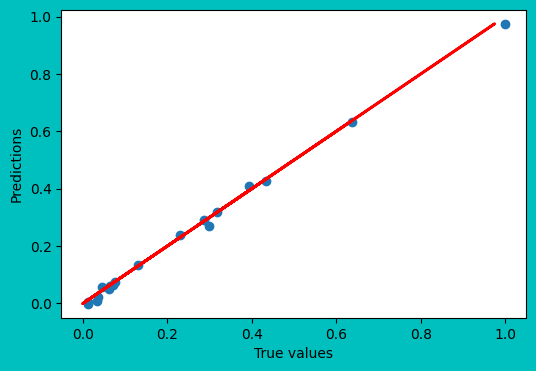

Mean Squared Error: 0.0011781756


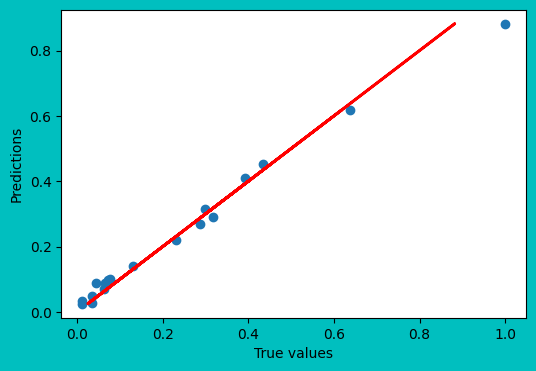

Mean Squared Error: 0.0011781756


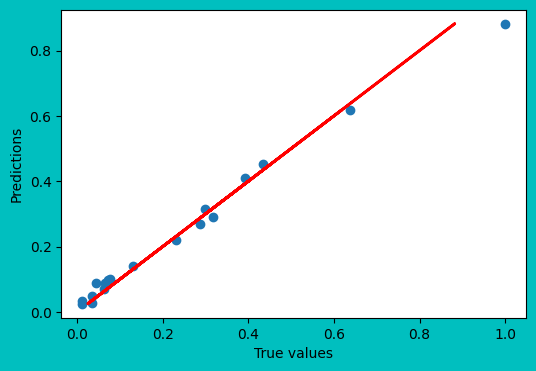

Mean Squared Error: 0.0294188966


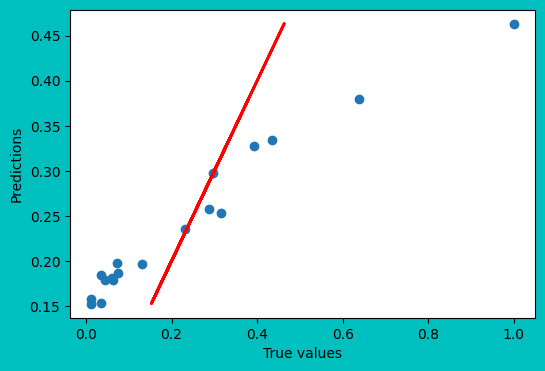

Mean Squared Error: 0.0008047100


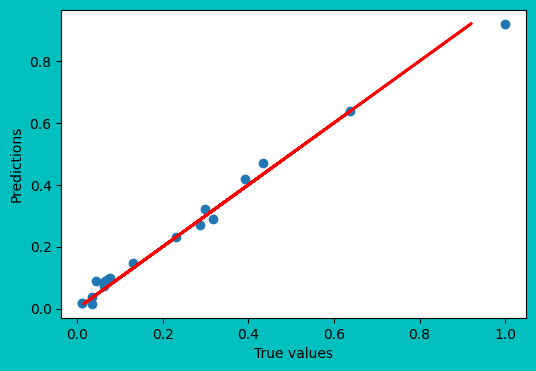

Mean Squared Error: 0.0004336873


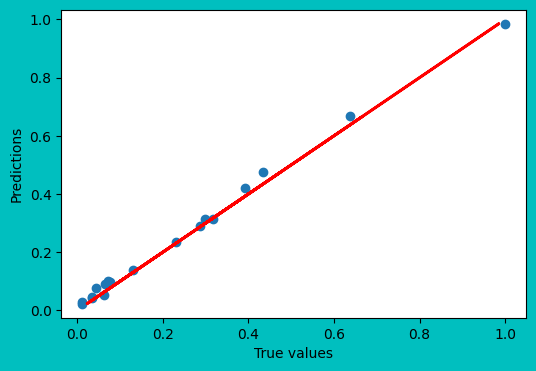

In [352]:
Algo(algo='Lars')
Algo(algo='Ridge', mIter=10000)
Algo(algo='Ridge', mIter=100000)
Algo('SGD', mIter=10000, lr=0.01)
Algo('SGD', mIter=10000, lr=0.1)
Algo(lr=0.8)